In [36]:
%matplotlib inline


import pandas as pd
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [38]:
Total2018 = pd.read_csv('Data/Total2018')

# Exploratory Data Analysis

In [39]:
sns.set()
sns.set_style("darkgrid", {'axes.grid' : False})


C:\Users\miste\Miniconda3\envs\tutorial\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [40]:
#Adding some columns that I believe to be important
Total2018['M/G'] = Total2018['MP']/Total2018['G']
Total2018['AST/TOV'] = Total2018['AST']/Total2018['TOV']

In [11]:
#Looking at the columns of my final data set and which ones I want to put in a pairplot
Total2018.columns

Index([u'Unnamed: 0', u'﻿Rk', u'Tm', u'2018-19', u'Name', u'Pos', u'G', u'GS',
       u'FG', u'FG%', u'3P', u'3P%', u'eFG%', u'FT%', u'ORB', u'TRB', u'AST',
       u'STL', u'BLK', u'PS/G', u'TOV', u'Age', u'WS', u'PER', u'MP', u'TRB%',
       u'AST%', u'TOV%', u'OWS', u'DWS', u'M/G', u'AST/TOV'],
      dtype='object')

## Which non per-game stats correlate to salary?

C:\Users\miste\Miniconda3\envs\tutorial\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


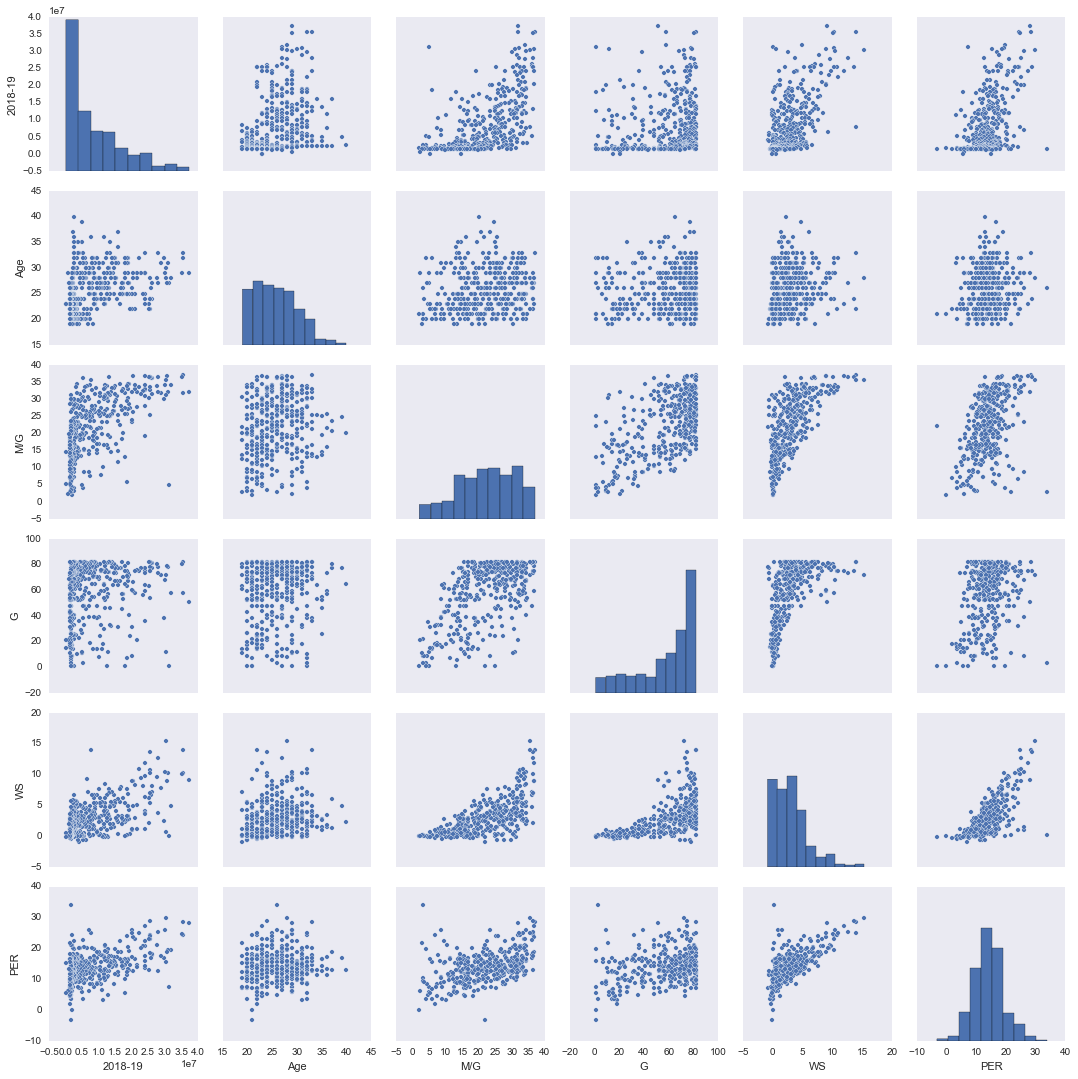

In [12]:
_ = sns.pairplot(Total2018[['2018-19','Age','M/G','G','WS','PER']])

In [13]:
Total2018[['2018-19','Age','M/G','G','WS','PER', 'GS']].corr()

,2018-19,Age,M/G,G,WS,PER,GS
2018-19,1.000000,0.328906,0.583939,0.193559,0.592359,0.469833,0.570109
Age,0.328906,1.000000,0.161012,0.126287,0.192164,0.127063,0.146088
M/G,0.583939,0.161012,1.000000,0.572216,0.668474,0.446772,0.798778
G,0.193559,0.126287,0.572216,1.000000,0.594740,0.287959,0.548048
WS,0.592359,0.192164,0.668474,0.594740,1.000000,0.704658,0.672902
PER,0.469833,0.127063,0.446772,0.287959,0.704658,1.000000,0.423825
GS,0.570109,0.146088,0.798778,0.548048,0.672902,0.423825,1.000000


From the above pearson correlation coefficients, WS and Games Started seem to have the strongest correlation to Salary. Interestingly, Win Shares and Games Played (not even games started) have a pretty strong correlation as well. The function written to calculate PER (Player Efficiency Rating) was made in order to gain an overall efficiency of a player, but looking at the correlation table and the pairplot, you can see that it is not a very good indicator of how much a person will be paid. 

Minutes Per Game also has a high correlation coefficient, which makes sense because if a player is being used more, then he will want to get more money as compensation. 

I was suprised to see that there seems to be very little correlation between age and salary, meaning that unlike a typical job, the average NBA player might not expect to see as much of an increase in pay just by being in the business for longer. 


## Which per-game statistics correlate to salary?

C:\Users\miste\Miniconda3\envs\tutorial\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


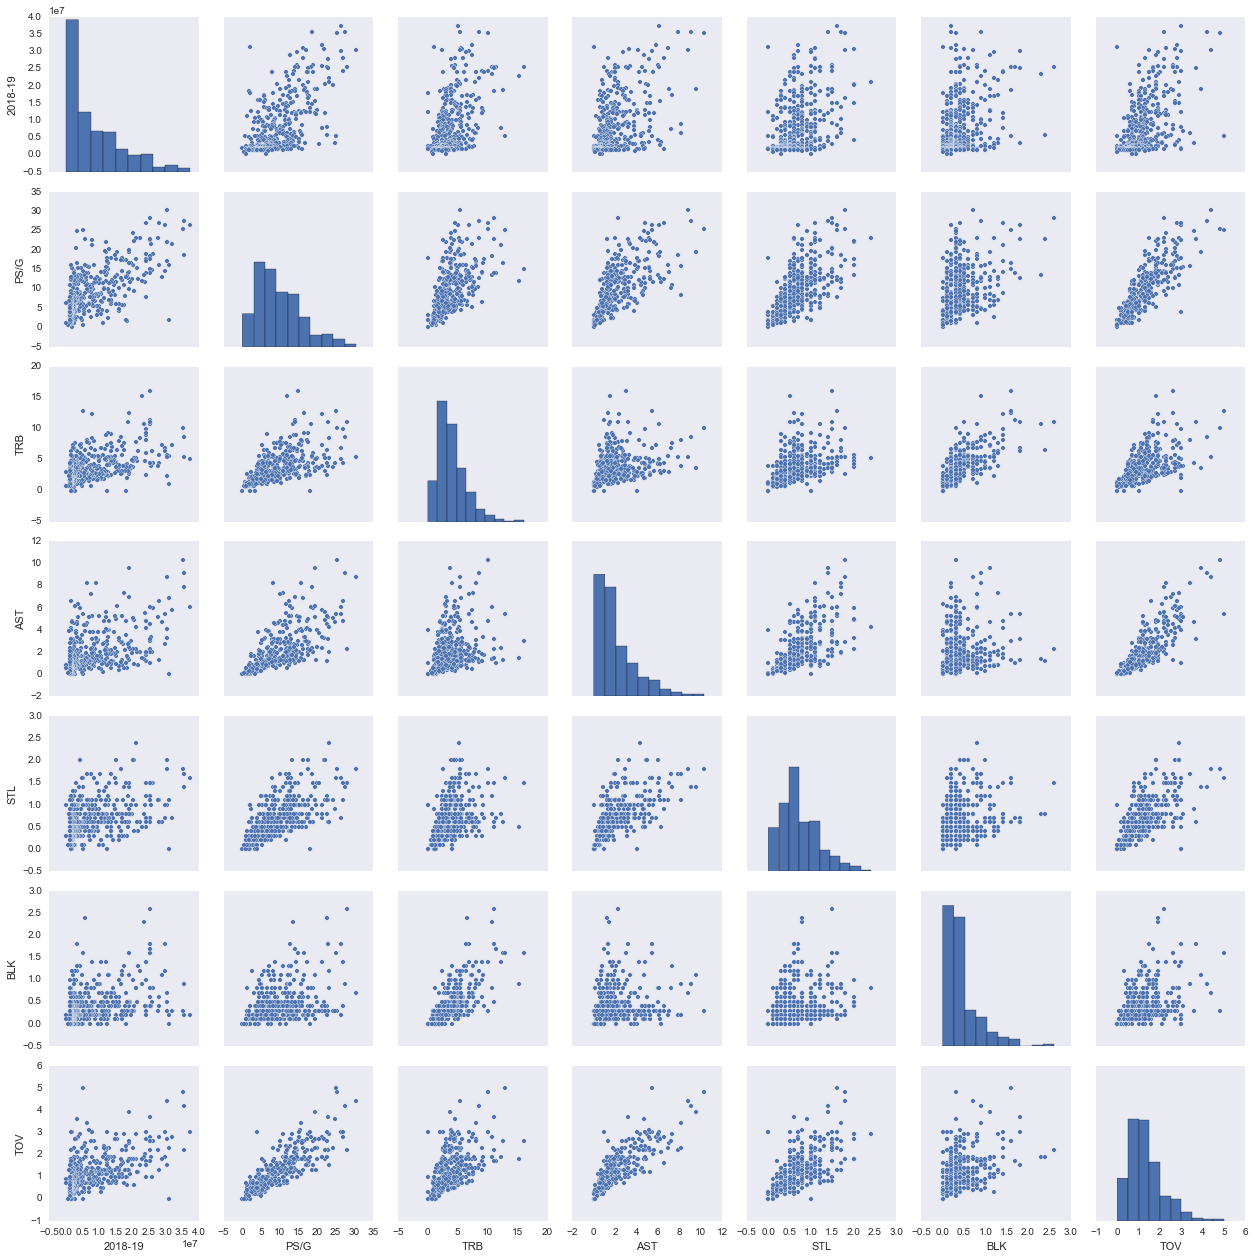

In [14]:
_ = sns.pairplot(Total2018[['2018-19','PS/G','TRB','AST','STL','BLK','TOV']])

In [15]:
Total2018[['2018-19','PS/G','TRB','AST','STL','BLK','TOV']].corr()

,2018-19,PS/G,TRB,AST,STL,BLK,TOV
2018-19,1.000000,0.637723,0.479556,0.468956,0.429137,0.318369,0.520448
PS/G,0.637723,1.000000,0.555301,0.676724,0.632762,0.368352,0.821201
TRB,0.479556,0.555301,1.000000,0.262503,0.357106,0.696326,0.523573
AST,0.468956,0.676724,0.262503,1.000000,0.645662,0.086598,0.825749
STL,0.429137,0.632762,0.357106,0.645662,1.000000,0.231238,0.632620
BLK,0.318369,0.368352,0.696326,0.086598,0.231238,1.000000,0.336800
TOV,0.520448,0.821201,0.523573,0.825749,0.632620,0.336800,1.000000


Points scored has the largest correlation coefficient amongst the 5 major stat categories. And surprisingly, Turnovers has the second highest correlation to salary. This is probably because players who hold the ball more, hence have a higher chance of losing the ball, are going to be paid more. 

This is interesting though, because you can see that almost every statistical category has a fairly strong correlation with many other statistical categories. A few that stood out to me are the relationships between AST-TOV, PS/G-TOV, TRB-BLK, and AST-PS/G. One would assume that if you scored more, that meant you didn't pass the ball as much, but that doesn't seem to be the case. 

This is indicative of the way basketball is played in the league now. Back in the early 2000s and earlier, there were "scorers" or "passers" or "rebounders", but now that is not enough to be great in the NBA. There are players like Russell Westbrook, who has averaged a triple double (double-digits in 3 stat categories) for the past two seasons. Now you need to score a lot, pass a lot, and get rebounds in order to be competitive in the league.

You can also see it in players who were great in the early 2000s and are still great now, like LeBron James, who has adapted his play style to increase his assists and rebounds. 

It is also interesting to se that BLK and AST have the lowest correlation of all the pairs, and that makes sense, since usually post players get blocks, and they aren't usually the play makers. 

### Do turnovers increase the more minutes a player has?

0.75556552548624367

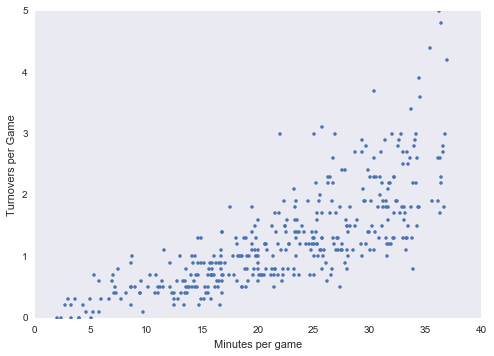

In [43]:
_ = plt.plot(Total2018['M/G'], Total2018['TOV'], marker = '.', linestyle = 'none')
_ = plt.xlabel('Minutes per game')
_ = plt.ylabel('Turnovers per Game')
np.corrcoef(Total2018['M/G'], Total2018['TOV'])[0,1]

Sure enough, minutes played and TOV per game has a fairly strong correlation, with a pearson correlation coefficient of 0.755.

So if a player wants to increase his salary, he should not just try to increase his TOVs, but rather play more minutes. 

## Is there a correlation between Assist to Turnover ratio and Salary? 
#### Meaning, if a player is throwing a lot of assists, should he also minimize his turnovers to get more money?

In the pariplot above, we saw that the correlation was very strong between assists and turnovers. This makes sense because basketball players who control the ball and create plays are more likely to throw assists, but at the same time, they are the ones most likely in the situation to throw a turnover.

I want to see if there is a strong correlation between the assist to turnover ratio and money, because classically, a good assist to turnover ratio was representative of being a good point guard. 

In [44]:
#Making a column for assist-to-turnover and calculating the mean
Total2018['AST/TOV'] = Total2018['AST/TOV'].replace([np.inf, -np.inf], np.nan)
mean_AST_TOV = np.mean(Total2018['AST/TOV'].dropna())
mean_AST_TOV

1.6185702326686804

In [51]:
#Replacing the missing values in the AST to TOV ratio with the average. These arose from a lack of turnovers or assists in the row
Total2018['AST/TOV'] = Total2018['AST/TOV'].replace(np.nan, mean_AST_TOV)

0.072677790469190026

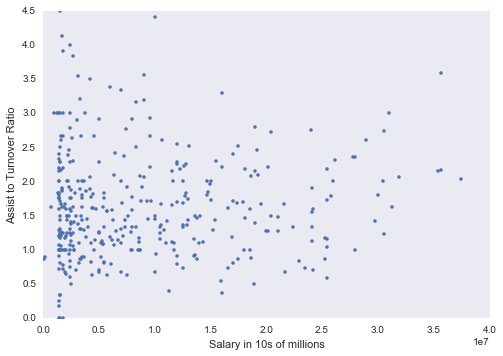

In [52]:
#plotting the 
_ = plt.plot(Total2018['2018-19'], Total2018['AST/TOV'], marker = '.', linestyle = 'none')
_ = plt.xlabel('Salary in 10s of millions')
_ = plt.ylabel('Assist to Turnover Ratio')
np.corrcoef(Total2018['2018-19'], Total2018['AST/TOV'])[0,1]

There seems to be pretty much no correlation between salary and the Assist to Turnover Ratio. But we know from the pairplot that there *was* a correlation between salary and assists and salary and turnovers. So this must mean that it doesn't really matter the success rate of your assists if you want to get paid. As long as you are getting a lot of assists, your salary will not decrease if you also throw a lot of turnovers. 

In today's fast paced game, with average scores going above 100, a turnover is probably not as costly as it once was when the game was more methodical and low scoring. 

### How much money should a player expect to earn for increase his per game averages? (with all else remaining equal)

In [53]:
Total2018['dollar_per_p/g'] = Total2018['2018-19']/Total2018['PS/G']


In [54]:
Total2018['dollar_per_p/g'] = Total2018['2018-19'].loc[Total2018['PS/G'] != 0]/Total2018['PS/G'].loc[Total2018['PS/G'] != 0]

In [55]:
Total2018 = Total2018.dropna(subset = ['dollar_per_p/g'])


In [56]:
#There are no more null in the column
np.sum(Total2018['dollar_per_p/g'].isnull())

0

In [57]:
#Finding the mean point per dollar for the entire NBA
np.mean(Total2018['dollar_per_p/g'])

1015098.6152142388

The average amount of money that a person earns per point per game is about $1,015,098 

There seems to be a correlation between win shares and salary

In [58]:
def slope_coeff(data_x, data_y):
    "This function is written to yield both the slope between two variables and it's Pearson Correlation Coefficient"
    slope, intercept = np.polyfit(data_x, data_y, 1)
    coeff = np.corrcoef(data_x, data_y)[0,1]
    return slope, coeff


In [59]:
slope_coeff(Total2018['WS'],Total2018['2018-19'])

(1712118.4417886285, 0.59142516126287559)

Based on the slope of the graph, for every Win Share that a player contributes to the team, he can expect to increase his salary by $1,712,118.

In [60]:
slope_coeff(Total2018['PS/G'],Total2018['2018-19'])

(879358.3289119805, 0.636945262809815)

For every point scored per game, a player can expect to increase his salary by about $880,000

In [61]:
slope_coeff(Total2018['TRB'],Total2018['2018-19'])

(1599000.5889268266, 0.4780612202858292)

For every rebound a person gets per game, a player can expect to increase his salary by $1,600,000, but the correlation is not as strong as it is in Points per game or Win Shares.

In [62]:
slope_coeff(Total2018['MP'], Total2018['TOV'])

(0.00060812985786487777, 0.58743859924022956)

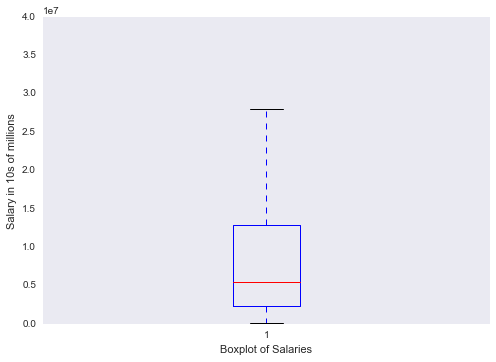

In [63]:
_ = plt.boxplot(Total2018['2018-19'])
_ = plt.xlabel('Boxplot of Salaries')
_ = plt.ylabel('Salary in 10s of millions')

## Is the there a significant difference in salary amongst the different positions?

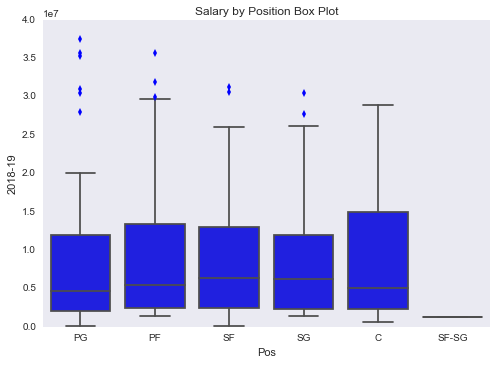

In [64]:
_ = sns.boxplot(x ='Pos', y = '2018-19', data = Total2018, color = 'b')
_ = plt.title('Salary by Position Box Plot')

From the boxplot, we can see that pointguards, though they have the smallest median salary, they have many outliers. Most likely because the point guard is usually the "quarter back" of the team, and might get a pay increase because of that. It also might be that, since the Point Guard is the face of the team, their salary might depend on the success of the team they play on. I will check to see if different teams pay different salaries. 



## Do different teams pay different amounts of money?

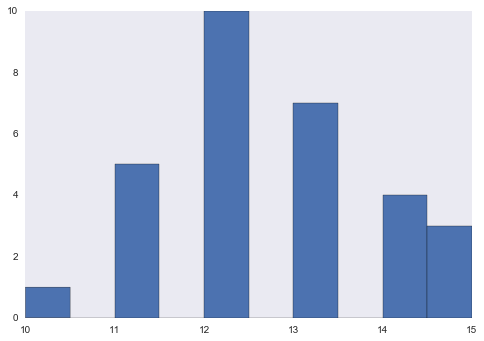

In [85]:
#Finding the number of teams in the league
_ = plt.hist(Total2018.groupby('Tm').count()['Name'])


Most of the teams have 12 players, some go up to 15, and one team only has 10 players on it. 

In [111]:
Total2018['2018-19'].loc[(Total2018['Tm'] == 'GSW') | (Total2018['Tm'] == 'HOU')]

0      37457154
1      35654150
9      30431854
10     30000000
41     20421546
50     18988725
61     17469565
71     16000000
90     13500375
151     8307692
155     7969537
193     5337000
223     3651480
271     2393887
287     2165481
306     1757429
318     1621415
323     1567007
331     1544951
333     1544951
346     1378252
354     1378242
376      122741
Name: 2018-19, dtype: int64

C:\Users\miste\Miniconda3\envs\tutorial\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


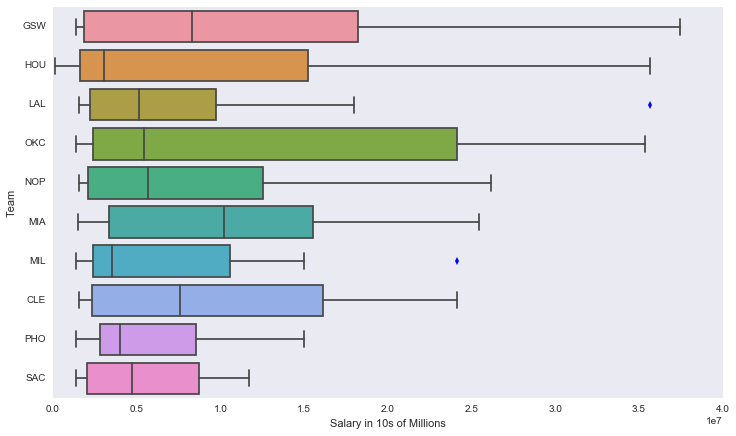

In [118]:
plt.figure(figsize=(12,7))
tm = sns.boxplot(x =Total2018['2018-19'], y = Total2018['Tm'].loc[(Total2018['Tm'] == 'GSW') | \
                                                                  (Total2018['Tm'] == 'OKC') | \
                                                                  (Total2018['Tm'] == 'HOU') | \
                                                                  (Total2018['Tm'] == 'LAL') | \
                                                                  (Total2018['Tm'] == 'MIA') | \
                                                                  (Total2018['Tm'] == 'CLE') | \
                                                                  (Total2018['Tm'] == 'PHO') | \
                                                                  (Total2018['Tm'] == 'NOP') | \
                                                                  (Total2018['Tm'] == 'MIL') | \
                                                                  (Total2018['Tm'] == 'SAC')
                                                                  ], orient = "h")
_ = tm.set(xlabel='Salary in 10s of Millions', ylabel='Team')


Ordering all of the salaries by team though, one can see that there is a huge disparity between them. The highest median salary in the NBA belongs to Miami, and the lowest all around belongs to Sacramento, whose highest paid player makes just around 12 million dollars. 

The NBA has a "soft" salary cap, meaning a team can exceed the salary cap if and only if they are resigning one of their own players. This is meant to foster fan support and to keep players in the same team, rather than going out to the best team (which is done quite often now in order to chase a championship). This could also explain why "dynasty teams" like the Warriors and OKC have such high salaries. 

What this means for my analysis is that the teams higher on the list have probably re-signed players, which allows them to pay the players more and have a higher overall salary cap. 

## How well did teams with the highest paid points guards do during the season?

In [34]:
PG_by_Tm = Total2018[['Name','Tm','2018-19']].loc[Total2018['Pos'] == 'PG'].sort_values(by = ['2018-19'], ascending = False)
PG_by_Tm.head(10)

,Name,Tm,2018-19
0,Stephen Curry,GSW,37457154
1,Chris Paul,HOU,35654150
3,Russell Westbrook,OKC,35350000
6,Kyle Lowry,TOR,31000000
8,Mike Conley,MEM,30521115
13,Damian Lillard,POR,27977689
43,Kyrie Irving,BOS,20099188
46,Tyler Johnson,MIA,19245370
47,John Wall,WAS,19169800
49,Jeff Teague,MIN,19000000


The above table shows that the top 10 highest paid point guards brought there teams at least to the playoffs, while the top 4 have made it to their respective conference finals either this year or in the past. The highest paid point guard on the list has led his team to 3 NBA championships in 4 years. This shows that, at least the level of scrutiny we are looking at the data now, the better a team performs, the more likely the point guard will get paid. 

### Can we see a difference in an individual team's roster in salary by position?

In [119]:
Salary_by_tm = Total2018[['Name','2018-19','GS','Tm', 'Pos']].loc[Total2018['Tm'] == 'GSW'].sort_values(by = ['2018-19'], ascending = False)
Salary_by_tm

,Name,2018-19,GS,Tm,Pos
0,Stephen Curry,37457154,51,GSW,PG
10,Kevin Durant,30000000,68,GSW,PF
50,Klay Thompson,18988725,73,GSW,SG
61,Draymond Green,17469565,70,GSW,PF
71,Andre Iguodala,16000000,7,GSW,SF
151,Shaun Livingston,8307692,7,GSW,PG
193,DeMarcus Cousins,5337000,48,GSW,C
287,Jonas Jerebko,2165481,19,GSW,PF
323,Kevon Looney,1567007,4,GSW,C
333,Damian Jones,1544951,0,GSW,C


Looking at the salaries for the highest paid team and individual player, you can see that the "big men" are all pretty much ranked much lower when it comes to salary. 

Overall, through my EDA, I have found that, though there may not be 1 big factor that goes into a salary, there are many statistics that are interrelated, and I can do more 

My hypothesis is that Win Shares, points, and Minutes per Game are the strongest indicators for how much a player will/ should be paid.